Big mini project

In [1]:
#Code 1.Calculating p_k(n)
import numpy as np
import math
import time

def pbreak(k,n):
    if k==1 or k==n or k==n-1:
        return 1
    if k > n:
        return 0
    if k==2:
        return math.floor(n/2)
    else:
        return pbreak(k-1,n-1) + pbreak(k,n-k)

In [2]:
#p_7(25) calculate

start = time.time()

res = pbreak(7,25)

end = time.time()

print('There are', res, 'ways')
print('run time is', end-start)

There are 248 ways
run time is 0.0009987354278564453


In [4]:
##question 2
q2 = pbreak(100,200)
print('There are',q2,'way to knot 100 strings')

There are 190569292 way to knot 100 strings


In [4]:
##question 3
#cj2 counter example

for i in range(10):
    print('When k = ',i + 1 ,'  partition number is ',pbreak(i+1,10))

print('')
for i in range(12):
    print('When k = ',i + 1 ,'  partition number is ',pbreak(i+1,12))
    
print('')

for i in range(14):
    print('When k = ',i + 1 ,'  partition number is ',pbreak(i+1,14))
print('')   
    
for i in range(20):
    print('When k = ',i + 1 ,'  partition number is ',pbreak(i+1,20))

When k =  1   partition number is  1
When k =  2   partition number is  5
When k =  3   partition number is  8
When k =  4   partition number is  9
When k =  5   partition number is  7
When k =  6   partition number is  5
When k =  7   partition number is  3
When k =  8   partition number is  2
When k =  9   partition number is  1
When k =  10   partition number is  1

When k =  1   partition number is  1
When k =  2   partition number is  6
When k =  3   partition number is  12
When k =  4   partition number is  15
When k =  5   partition number is  13
When k =  6   partition number is  11
When k =  7   partition number is  7
When k =  8   partition number is  5
When k =  9   partition number is  3
When k =  10   partition number is  2
When k =  11   partition number is  1
When k =  12   partition number is  1

When k =  1   partition number is  1
When k =  2   partition number is  7
When k =  3   partition number is  16
When k =  4   partition number is  23
When k =  5   partition nu

In [4]:

def findmax(n):
    mn =[]
    mpar = 1
    for i in range(n):
        tmp = pbreak(i+1,n)
        if mpar == tmp:
            mn.append((n,i+1))
            
        if mpar < tmp:
            mn = [(n,i+1)]
            mpar = tmp
                    
    return mn


def pointlist(n):
    alist=[]
    for i in range(n):
        alist =alist + findmax(i+1)
    return alist
            
for i in range(0,20):
    print('When k is',i+1,'m(n) is',findmax(i+1))

When k is 1 m(n) is [(1, 1)]
When k is 2 m(n) is [(2, 1), (2, 2)]
When k is 3 m(n) is [(3, 1), (3, 2), (3, 3)]
When k is 4 m(n) is [(4, 2)]
When k is 5 m(n) is [(5, 2), (5, 3)]
When k is 6 m(n) is [(6, 2), (6, 3)]
When k is 7 m(n) is [(7, 3)]
When k is 8 m(n) is [(8, 3), (8, 4)]
When k is 9 m(n) is [(9, 3)]
When k is 10 m(n) is [(10, 4)]
When k is 11 m(n) is [(11, 4)]
When k is 12 m(n) is [(12, 4)]
When k is 13 m(n) is [(13, 4), (13, 5)]
When k is 14 m(n) is [(14, 4), (14, 5)]
When k is 15 m(n) is [(15, 5)]
When k is 16 m(n) is [(16, 5)]
When k is 17 m(n) is [(17, 5)]
When k is 18 m(n) is [(18, 6)]
When k is 19 m(n) is [(19, 6)]
When k is 20 m(n) is [(20, 6)]


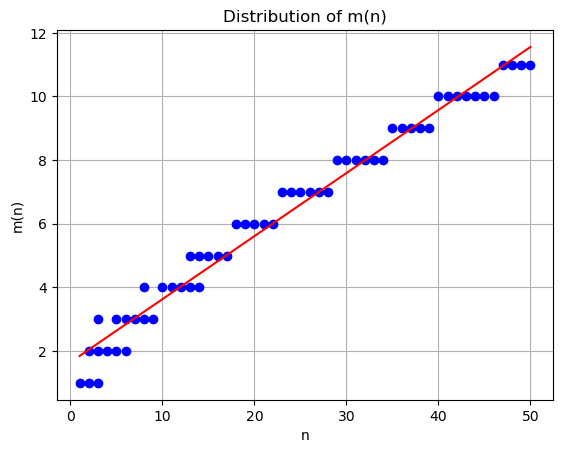

y =  0.19815430783224117 * x + 1.6491883601888189


In [6]:
#question 3 find max
import matplotlib.pyplot as plt


#for i in range(30):
#    print('When k is',i+1,'m(n) is',findmax(i+1))
    


pointl = pointlist(50)

xaxis = [coord[0] for coord in pointl]
yaxis = [coord[1] for coord in pointl]

xconst = np.arange(1,51)

slop, diff = np.polyfit(xaxis, yaxis, 1)


tline = slop * xconst + diff


plt.title('Distribution of m(n)')
plt.plot(xaxis,yaxis,'bo')
plt.plot(xconst,tline,'r')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('m(n)')


plt.show()
print('y = ',slop,'* x +', diff)


In [7]:
print(pbreak(20,100))
print(pbreak(10,100))
print(pbreak(15,100))

10474462
2977866
9921212


In [8]:
print(pbreak(17,100))

11022546


In [9]:
print(pbreak(16,100))

10643083


In [10]:
print(pbreak(18,100))

11087828


In [11]:
print(pbreak(19,100))

10885999


In [40]:
##question 3

def findmax2(n):
    dleft = 2
    dright = n-1
    find = False
    count = 0
    kmax = []
    while find==False:
        mean = math.floor((dright + dleft)/2)
        print(mean)
        tmp = pbreak(mean,n)
        tmpl = pbreak(mean-1,n)
        tmpr = pbreak(mean+1,n)
        count += 3
        i = 1
        j = 1
        while tmp == tmpl:
            kmax.append(mean-i+1)
            i +=1
            tmpl = pbreak(mean-i,n)
            count +=1
            if mean-i == 2:
                break
        while tmp == tmpr:
            kmax.append(mean+j-1)
            j += 1
            tmpr = pbreak(mean+j,n)
            count +=1
            if mean+j ==n-1:
                break
        if tmp>tmpl and tmp>tmpr:
            find = True
            if mean not in kmax:
                kmax.append(mean)
            return kmax,count
        if tmp<tmpl or tmp>tmpr:
            dright = mean
            kmax = []
        if tmp>tmpl or tmp<tmpr:
            dleft = mean
            kmax = []
        



In [35]:
for i in range(100):
    print('k=',i+1,'partition number', pbreak(i+1,100))

k= 1 partition number 1
k= 2 partition number 50
k= 3 partition number 833
k= 4 partition number 7153
k= 5 partition number 38225
k= 6 partition number 143247
k= 7 partition number 407254
k= 8 partition number 930912
k= 9 partition number 1786528
k= 10 partition number 2977866
k= 11 partition number 4426616
k= 12 partition number 5994463
k= 13 partition number 7520910
k= 14 partition number 8863685
k= 15 partition number 9921212
k= 16 partition number 10643083
k= 17 partition number 11022546
k= 18 partition number 11087828
k= 19 partition number 10885999
k= 20 partition number 10474462
k= 21 partition number 9909482
k= 22 partition number 9243766
k= 23 partition number 8520721
k= 24 partition number 7776463
k= 25 partition number 7037286
k= 26 partition number 6323274
k= 27 partition number 5647002
k= 28 partition number 5017195
k= 29 partition number 4437567
k= 30 partition number 3910071
k= 31 partition number 3433592
k= 32 partition number 3006581
k= 33 partition number 2625726
k= 3

In [39]:
findmax2(100)

([18], 18)